In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install monai==1.3.0 nibabel SimpleITK scikit-learn pandas matplotlib
!pip install itk
!pip install -q monai[itk] SimpleITK itk

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.9 MB/s eta 0:00:00
  Attempting uninstal

In [ ]:
!ls /content/drive/MyDrive/

'1. Microprocessor complete class note (1).pdf'
'1. Microprocessor complete class note.pdf'
'Ai ut solution.pdf'
'Auto_CatalystReport 1.pdf'
'Capacitor pdf manual.pdf'
 Classroom
'Colab Notebooks'
'Compressed Compressed Ai assessment solu (1).pdf'
'Compressed Compressed Ai assessment solu.pdf'
'edc set 020324.pdf'
'F05-1-Product Backlog Jestate Client-A Real State System V2.0.gsheet'
 lab-Report1.docx
 Labsheet0.docx
 Labsheet0.gdoc
 labsheet2_false_position.docx
 labsheet3_newton_rhapson.docx
 labsheet4_secant_method.docx
 labsheet5_Gauss_method.docx
 labsheet6gauss_seidel.docx
'microprocessor ioe full note-tuts by er. hari aryaल.pdf'
 OStutorial.pdf
'programming for everybody(Python).pdf'
 prostate_project
 tutorial-4.pdf


In [ ]:
!pip install SimpleITK

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# 1. Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
from torchvision.models import vgg16, VGG16_Weights

weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 61.8MB/s]


In [ ]:
# 2. Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [ ]:
import os

# 3. Path setup
project_root = "/content/drive/MyDrive/prostate_project"
images_dir = os.path.join(project_root, "mri_images")
clinical_data_path = os.path.join(project_root, "marksheet.csv")

In [ ]:
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)

model = model.to(device)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# 4. load VGG16
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=(224, 224, 3)))

base_model.trainable = False  # freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,747,585 (56.26 MB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import os
import time
import pandas as pd

# 5. Load dataset

clinical_data_dir = os.path.dirname(clinical_data_path)
print(f"Checking if directory exists: {clinical_data_dir}")
max_wait_time = 30 # seconds
wait_interval = 5 # seconds
elapsed_time = 0
while not os.path.exists(clinical_data_dir) and elapsed_time < max_wait_time:
    print(f"Directory not found: {clinical_data_dir}. Waiting for {wait_interval} seconds...")
    time.sleep(wait_interval)
    elapsed_time += wait_interval

if not os.path.exists(clinical_data_dir):
    print(f"Error: Directory {clinical_data_dir} still not found after {max_wait_time} seconds. Please ensure Google Drive is mounted correctly.")
else:
    print(f"Directory found: {clinical_data_dir}")
    if not os.path.exists(clinical_data_path):
        print(f"Error: Clinical data file not found at {clinical_data_path} even though the directory exists.")
        print(f"Contents of {clinical_data_dir}:")
        try:
            print(os.listdir(clinical_data_dir))
        except Exception as e:
            print(f"Could not list directory contents: {e}")
    else:
        print(f"Clinical data file found: {clinical_data_path}")

        # Load clinical data

        clinical_df = pd.read_csv(clinical_data_path)
        clinical_df['case_csPCa'] = clinical_df['case_csPCa'].map({'YES': 1.0, 'NO': 0.0})

Checking if directory exists: /content/drive/MyDrive/prostate_project
Directory found: /content/drive/MyDrive/prostate_project
Clinical data file found: /content/drive/MyDrive/prostate_project/marksheet.csv


In [ ]:
import os
from sklearn.model_selection import train_test_split

# 6. Load DataList

data_list = []
for idx, row in clinical_df.iterrows():
    pid = str(row["patient_id"])
    folder = os.path.join(images_dir, pid)
    # Add a check for the image directory as well
    if not os.path.exists(folder):
        continue
    all_files = os.listdir(folder)
    try:
        t2w = [f for f in all_files if "t2w" in f.lower()][0]
        t2w_path = os.path.join(folder, t2w)
    except:
        # This patient folder does not contain a T2W image with "t2w" in the filename
        continue

    label = row["case_csPCa"]
    if os.path.exists(t2w_path):
        data_list.append({"t2w": t2w_path, "label": label})

print(f"Total usable cases: {len(data_list)}")
if data_list:
    train_data, test_data = train_test_split(data_list, test_size=0.2, random_state=42, stratify=[d["label"] for d in data_list])
    print(f"Train: {len(train_data)} | Test: {len(test_data)}")

Total usable cases: 1500
Train: 1200 | Test: 300


In [ ]:
import SimpleITK as sitk
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# 7. MRI loading and preprocessing

def load_middle_slice(path):
    img = sitk.ReadImage(path)
    array = sitk.GetArrayFromImage(img)
    mid_slice = array[array.shape[0] // 2]
    return mid_slice.astype(np.float32)

class ProstateMRIDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        image = load_middle_slice(item["t2w"])

        # Ensure image has 3 channels for VGG16
        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=-1)  # (H, W, 1)
            image = np.repeat(image, 3, axis=-1)    # (H, W, 3)
        elif image.shape[2] == 1:
             image = np.repeat(image, 3, axis=-1)    # (H, W, 3)

        # Convert numpy array to PIL Image before applying torchvision transforms
        image = transforms.ToPILImage()(image)

        if self.transform:
            image = self.transform(image)

        label = torch.tensor(item["label"], dtype=torch.long)
        return image, label

# Transform for VGG16
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# DataLoaders
# Using the train_data and test_data generated in the previous step

train_dataset = ProstateMRIDataset(train_data, transform)
test_dataset = ProstateMRIDataset(test_data, transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 8. Load pretrained VGG16 (PyTorch)
try:
    model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
    for param in model.features.parameters():
        param.requires_grad = False  # freeze feature extractor
except Exception as e:
    print(f"Error loading pretrained VGG16 model: {e}")
    print("Please ensure you have an internet connection to download the weights.")

    # Fallback to a non-pretrained model or handle the error appropriately

    model = models.vgg16(weights=None) # Load model without pretrained weights
    for param in model.features.parameters():
        param.requires_grad = True # Train all parameters if no pretrained weights

# 9. Replace classifier
# Assuming binary classification (2 classes)

model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)
model = model.to(device)

# Loss and optimizer

criterion = nn.CrossEntropyLoss()

# Optimize only the parameters of the classifier

optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)

In [ ]:
# 10. VGG16 Model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from torchvision.models import vgg16, VGG16_Weights
from tqdm import tqdm

weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights)

# freeze the feature extractor
for param in model.features.parameters():
    param.requires_grad = False

# Modify the classifier to match 2 classes
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 2)

model = model.to(device)

#  Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 10

# Training loop
model.train()
for epoch in range(epochs):
    running_loss = 0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)   # VGG16 has only one output

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1} loss: {running_loss/len(train_loader):.4f}")

Epoch 1: 100%|██████████| 150/150 [36:01<00:00, 14.41s/it]


Epoch 1 loss: 0.6647


Epoch 2: 100%|██████████| 150/150 [25:42<00:00, 10.28s/it]


Epoch 2 loss: 0.5845


Epoch 3: 100%|██████████| 150/150 [26:18<00:00, 10.52s/it]


Epoch 3 loss: 0.5207


Epoch 4: 100%|██████████| 150/150 [25:51<00:00, 10.34s/it]


Epoch 4 loss: 0.4001


Epoch 5: 100%|██████████| 150/150 [27:46<00:00, 11.11s/it]


Epoch 5 loss: 0.2461


Epoch 6: 100%|██████████| 150/150 [29:05<00:00, 11.64s/it]


Epoch 6 loss: 0.2011


Epoch 7: 100%|██████████| 150/150 [29:06<00:00, 11.64s/it]


Epoch 7 loss: 0.1601


Epoch 8: 100%|██████████| 150/150 [28:57<00:00, 11.59s/it]


Epoch 8 loss: 0.1617


Epoch 9: 100%|██████████| 150/150 [28:35<00:00, 11.44s/it]


Epoch 9 loss: 0.1434


Epoch 10: 100%|██████████| 150/150 [28:43<00:00, 11.49s/it]

Epoch 10 loss: 0.0607


Validation Accuracy: 71.00%


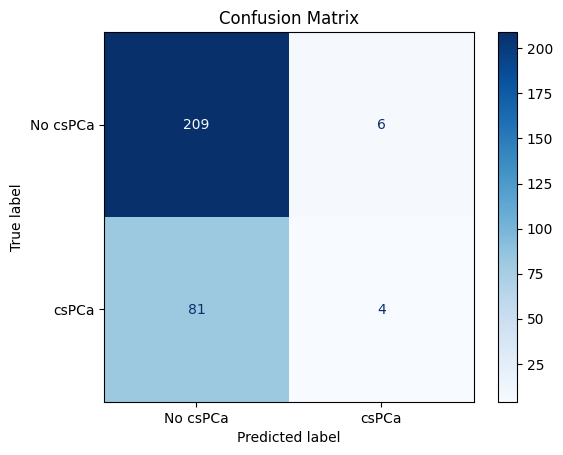

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 11. Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# compute metrics
acc = accuracy_score(all_labels, all_preds)
cm = confusion_matrix(all_labels, all_preds)

print(f"Validation Accuracy: {acc * 100:.2f}%")

# display confusion matrix
cm_display = ConfusionMatrixDisplay(
    cm,
    display_labels=["No csPCa", "csPCa"]
)
cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
